# Geometric Distortion Correction

- Input : The original image
- Output : Its rectified image (w/o geometric distortion)
- Given : Its camera matrix and distortion coefficient
- Solutions for the polynomial distortion model
  - OpenCV `cv::undistort()` and `cv::undistortPoints()` (cf. included in imgproc module) <br>
  　　　　　　　　　　　　　↔ `cv::projectPoints()` (cf. included in calib3d module)
  - Camera Distortion Correction : Theory and Practice, http://darkpgmr.tistory.com/31

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
%matplotlib inline

In [2]:
## Camera Intrinsic Parameter
fx, fy = 432.7390364738057, 431.2395555913084
cx, cy = 476.0614994349778, 288.7602152621297
K = np.array([[fx, 0, cx],
              [0, fy, cy],
              [0, 0, 1]], dtype=np.float32)
## Distorion Coefficient
dist_coeff = np.array([-0.2852754904152874, 0.1016466459919075, -0.0004420196146339175, 0.0001149909868437517, -0.01803978785585194])

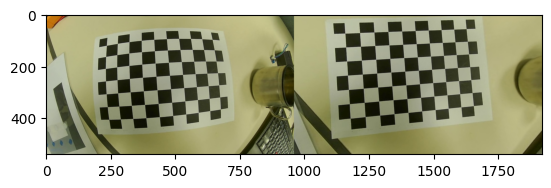

In [3]:
input = "../bin/data/chessboard.avi"
cap = cv2.VideoCapture(input)
if cap.isOpened() == False: raise Exception("No Video")


map1 = np.array([])
map2 = np.array([])
while True:
    ret, image = cap.read()
    if not ret: break

    ## Distortion Correction
    if not(len(map1) & len(map2)):
        map1, map2 = cv2.initUndistortRectifyMap(K, dist_coeff, None, None, (image.shape[1], image.shape[0]), cv2.CV_32FC1)
    undistortion_image = cv2.remap(image, map1, map2, interpolation=cv2.INTER_LINEAR) 
    images = np.hstack((image, undistortion_image))
    cv2.imshow("image", images)
    
    if cv2.waitKey(1) == 27: break
cv2.destroyAllWindows()
plt.imshow(images[:, :, (2, 1, 0)])
plt.show()